In [1]:
import cartopy.crs as ccrs
from extractROIfiles import normIm, cartopy_pyresample_toggle_extent,  trasform_cartopy_extent
from extractROIfiles import getPlankConsts, Rad2BT, mat2pandas
from pathlib import Path
from matplotlib import pyplot as plt
import numpy as np
import xarray as xr
import os
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import seaborn as sns
from datetime import datetime
import pandas as pd
from scipy import io as so
sns.set(style='darkgrid')
%matplotlib inline

In [2]:
# Laptop paths
datapath = Path('/','mnt','c','Users','michael.GLASSLAB-MODIIN','.Virtualbox','Desktop','roi_fall_data')
matfilepath = Path('/home/michael/dropbox/goesproject/GOESEvalData')
#outputpath = Path('/','mnt','g','GOESProj','data','fall_data')
fname16_103 = datapath/Path('OR_ABI-L1b-RadF-M6C08_G16_s2019103_xr.nc')
fname17_103 = datapath/Path('OR_ABI-L1b-RadF-M6C08_G17_s2019103_xr.nc')
tempFname = matfilepath/Path('INST_CAL_2019103.mat')

In [3]:
fname16_103.exists()

True

In [4]:
fname17_103.exists()

True

In [5]:
pc = ccrs.PlateCarree()
mc = ccrs.Mercator()

# Convert extent from pc to mc (both cylindrical projections)
extent_pc = [-109.59326, -102.40674, 8.94659, -8.94656]
target_extent_mc_cartopy = trasform_cartopy_extent(extent_pc, pc, mc)
target_extent_mc_pyresample = cartopy_pyresample_toggle_extent(target_extent_mc_cartopy)
print('target_extent_mc_pyresample',target_extent_mc_pyresample)
print('target_extent_mc_cartopy',target_extent_mc_cartopy)


target_extent_mc_pyresample [-12199865.89757484    993361.38872422 -11399866.15059916
   -993358.03009699]
target_extent_mc_cartopy [-12199865.89757484 -11399866.15059916    993361.38872422
   -993358.03009699]


In [6]:
new16_103_xr = xr.load_dataset(fname16_103)

In [7]:
new17_103_xr = xr.load_dataset(fname17_103)

In [8]:
date16_103 = str(new16_103_xr.time[0].dt.strftime('%Y %B %d').data)
print(date16_103)

2019 April 13


/home/michael/miniconda3/envs/goesenv/lib/python3.8/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


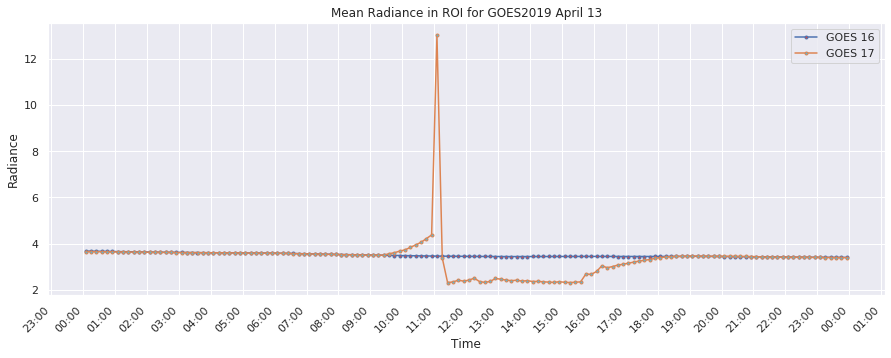

In [9]:
fig, ax = plt.subplots(figsize=(15,5))
new16_103_xr.Rad.mean(['x','y']).plot(ax=ax,marker='.',mfc='r',label='GOES 16')
new17_103_xr.Rad.mean(['x','y']).plot(ax=ax,marker='.',mfc='c',label='GOES 17')
ax.set_title('Mean Radiance in ROI for GOES'+str(new16_103_xr.time[0].dt.strftime('%Y %B %d').data))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:00'))
#ax.xaxis.set_major_locator(ticker.MultipleLocator(1/24))
ax.xaxis.set_major_locator(mdates.HourLocator())
ax.set_ylabel('Radiance')
ax.set_xlabel('Time')
ax.legend()
ax.tick_params('x', labelrotation=45)

In [190]:
def getPlankConsts(satim):
    """Extract the planck parameters fk1, fk2, bc1 and bc2 for temperature conversion."""
    fk1 = satim['planck_fk1'].data[0] if len(satim['planck_fk1'].data)> 1 else satim['planck_fk1'].data
    fk2 = satim['planck_fk2'].data[0] if len(satim['planck_fk2'].data)> 1 else satim['planck_fk2'].data
    bc1 = satim['planck_bc1'].data[0] if len(satim['planck_bc1'].data)> 1 else satim['planck_bc1'].data
    bc2 = satim['planck_bc2'].data[0] if len(satim['planck_bc2'].data)> 1 else satim['planck_bc2'].data
    return {
    'fk1':float(fk1),
    'fk2':float(fk2),
    'bc1':float(bc1),                       
    'bc2':float(bc2)}

In [15]:
plc = getPlankConsts(new16_103_xr)

In [186]:
new16_103_bt.shape

(144,)

In [10]:
temp17 = so.loadmat(tempFname)
#df_temp_17 = pd.DataFrame({'Temperture':temp17,'time':new17_103_xr.time.data})
temp17

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Thu Jun 27 20:15:21 2019',
 '__version__': '1.0',
 '__globals__': [],
 'LWIRTemp': array([[80.8793869 , 80.88565826, 80.80680084, ..., 80.84153748,
         80.90301514, 80.90615082]]),
 'TIME': array([[737528.00000589, 737528.00001747, 737528.00002904, ...,
         737528.99997152, 737528.99998309, 737528.99999466]])}

In [11]:
temp_df = mat2pandas(temp17)

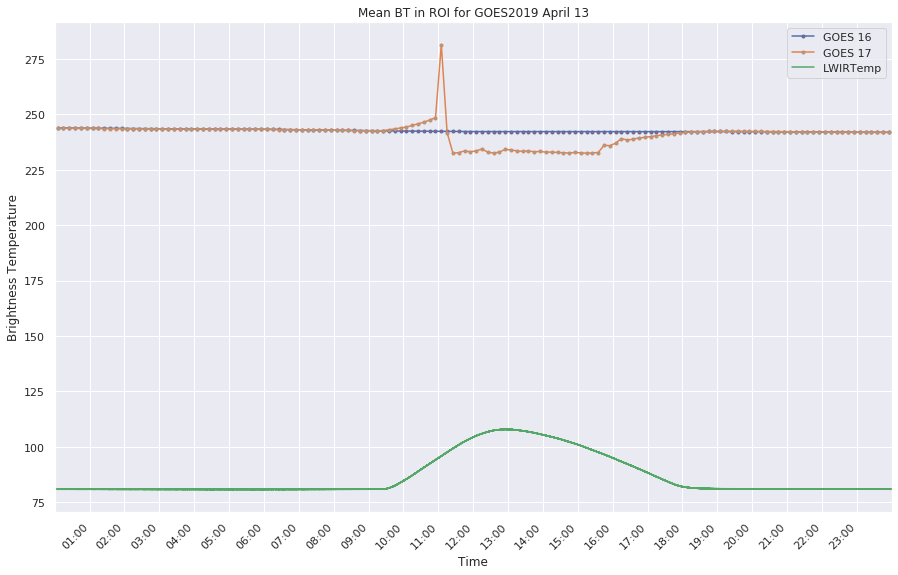

In [18]:
fig, ax = plt.subplots(figsize=(15,10))
Rad2BT(new16_103_xr.Rad.mean(['x','y']), plc).plot(ax=ax,marker='.',mfc='r', label='GOES 16')
Rad2BT(new17_103_xr.Rad.mean(['x','y']), plc).plot(ax=ax,marker='.',mfc='c', label='GOES 17')
temp_df.plot(ax=ax,mfc='k',label='GOES 17 LWIRTemp')
ax.set_title('Mean BT in ROI for GOES'+str(new16_103_xr.time[0].dt.strftime('%Y %B %d').data))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:00'))
#ax.xaxis.set_major_locator(ticker.MultipleLocator(1/24))
ax.xaxis.set_major_locator(mdates.HourLocator())
ax.set_ylabel('Brightness Temperature')
ax.set_xlabel('Time')
ax.set
ax.legend()
ax.tick_params('x', labelrotation=45)

In [165]:
npysampledir = Path('/home/michael/dropbox/goesproject/sample_npy')
nmpy_files = list(npysampledir.glob('*'))

In [171]:
npydata0 = np.load(nmpy_files[0])

In [172]:
npydata0.shape

(1001, 401)

In [173]:
npydata0.mean()

3.6525576

In [175]:
new17_103_xr.Rad.data[:,:,0].mean()

3.652508

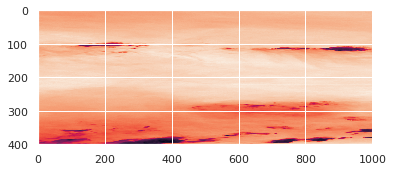

In [178]:
plt.imshow(new17_103_xr.Rad.data[:,:,0])

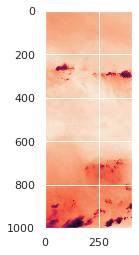

In [179]:
plt.imshow(npydata0)

In [14]:
bt16 = Rad2BT(new16_103_xr.Rad, plc)
bt17 = Rad2BT(new17_103_xr.Rad, plc)

/home/michael/miniconda3/envs/goesenv/lib/python3.8/site-packages/xarray/core/computation.py:601: RuntimeWarning: invalid value encountered in log
  result_data = func(*input_data)


In [ ]:
fig, ax = plt.subplots(figsize=(15,5))
Rad2BT(new16_103_xr.Rad, plc).plot(ax=ax,marker='.',mfc='r', label='GOES 16')
Rad2BT(new17_103_xr.Rad, plc).plot(ax=ax,marker='.',mfc='c', label='GOES 17')
ax.set_title('Mean BT in ROI for GOES'+str(new16_103_xr.time[0].dt.strftime('%Y %B %d').data))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:00'))
#ax.xaxis.set_major_locator(ticker.MultipleLocator(1/24))
ax.xaxis.set_major_locator(mdates.HourLocator())
ax.set_ylabel('Brightness Temperature')
ax.set_xlabel('Time')
ax.legend()
ax.tick_params('x', labelrotation=45)